### Importing the required modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading the data set

In [2]:
data = pd.read_csv('./Cuisine_rating.csv')
data.head()

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No


### Datatypes

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User ID         200 non-null    int64  
 1   Area code       200 non-null    int64  
 2   Location        200 non-null    object 
 3   Gender          200 non-null    object 
 4   YOB             200 non-null    int64  
 5   Marital Status  200 non-null    object 
 6   Activity        200 non-null    object 
 7   Budget          200 non-null    int64  
 8   Cuisines        200 non-null    object 
 9   Alcohol         200 non-null    object 
 10  Smoker          200 non-null    object 
 11  Food Rating     200 non-null    int64  
 12  Service Rating  200 non-null    int64  
 13  Overall Rating  200 non-null    float64
 14  Often A S       200 non-null    object 
dtypes: float64(1), int64(6), object(8)
memory usage: 23.6+ KB


### Columns

In [4]:
data.columns

Index(['User ID', 'Area code', 'Location', 'Gender', 'YOB', 'Marital Status',
       'Activity', 'Budget', 'Cuisines', 'Alcohol ', 'Smoker', 'Food Rating',
       'Service Rating', 'Overall Rating', 'Often A S'],
      dtype='object')

### droping the unnecessary columns

In [5]:
data.drop(columns=['User ID','Area code'],inplace=True)
data.head()

,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No


### Renaming colunms

In [6]:
data.rename(columns={'Marital Status':'Marital_Status','Alcohol ':'Alcohol','Food Rating':'Food_Rating','Service Rating':'Service_Rating','Overall Rating':'Overall_Rating','Often A S':'Often_A_S'},inplace=True)

### Converting YOB to Age

In [7]:
data['Age'] = [(2022-YOB) for YOB in data['YOB']]

### droping YOB

In [8]:
data.drop(columns='YOB',inplace=True)
data.head()

,Location,Gender,Marital_Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food_Rating,Service_Rating,Overall_Rating,Often_A_S,Age
0,"Upper East Side,NY",Female,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No,16
1,"St. George,NY",Female,Married,Student,3,Indian,Never,Socially,1,1,1.0,No,31
2,"Upper West Side,NY",Male,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes,45
3,"Upper East Side,NY",Female,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No,66
4,"Central Park,NY",Male,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No,25


In [9]:
data.shape

(200, 13)

In [10]:
data.size

2600

### Null percentage

In [11]:
data.isnull().mean()*100

Location          0.0
Gender            0.0
Marital_Status    0.0
Activity          0.0
Budget            0.0
Cuisines          0.0
Alcohol           0.0
Smoker            0.0
Food_Rating       0.0
Service_Rating    0.0
Overall_Rating    0.0
Often_A_S         0.0
Age               0.0
dtype: float64

### Duplicates

In [12]:
data.duplicated().sum()

79

### Droping duplicates

In [13]:
data.drop_duplicates(inplace=True)

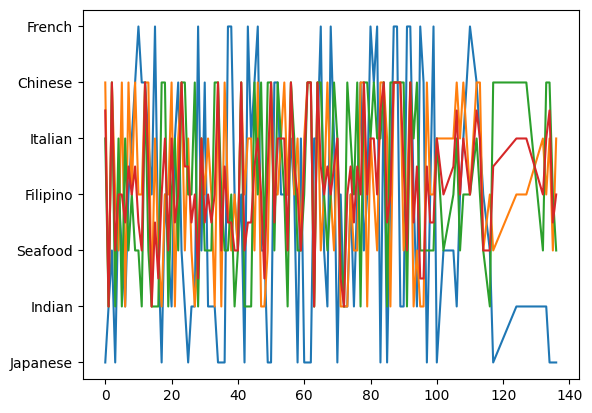

In [14]:
plt.plot(data.Cuisines)
plt.plot(data.Food_Rating)
plt.plot(data.Service_Rating)
plt.plot(data.Overall_Rating)
plt.show()

### Cuisines vs Gender Countplot

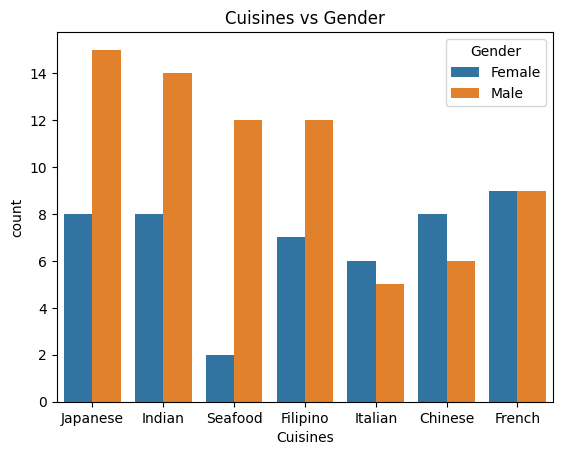

In [15]:
sns.countplot(data=data,x='Cuisines',hue='Gender');
plt.title('Cuisines vs Gender')
plt.show()

### Persons who prefers cuisines according to Marital status-countplot

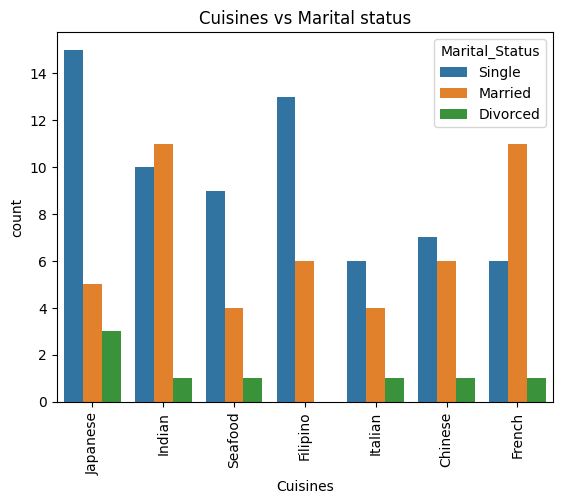

In [16]:
sns.countplot(data=data,x='Cuisines',hue='Marital_Status')
plt.xticks(rotation=90)
plt.title('Cuisines vs Marital status')
plt.show()

### Rating of Cuisines-countplot

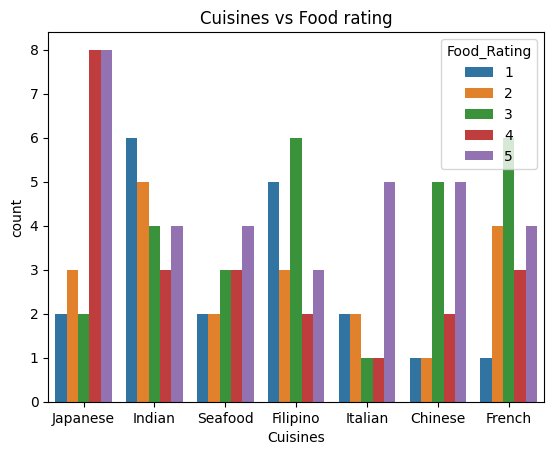

In [17]:
sns.countplot(data=data,x='Cuisines',hue='Food_Rating');
plt.title('Cuisines vs Food rating')
plt.show()

### Preferance of location

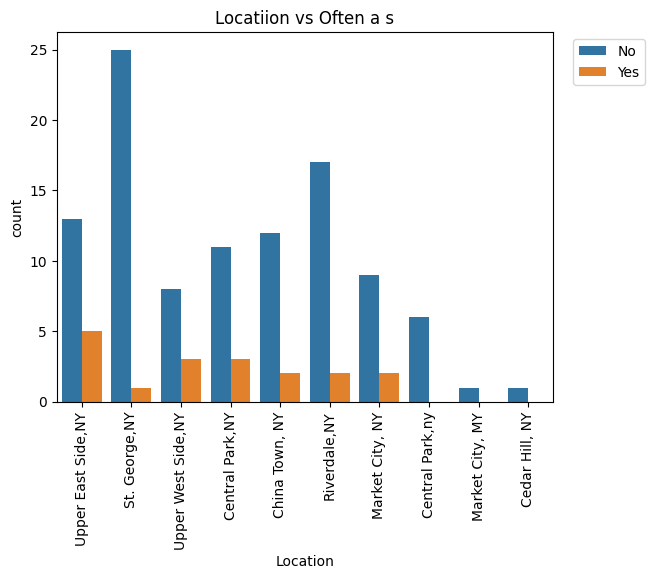

In [18]:
sns.countplot(data=data,x='Location',hue='Often_A_S')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.2,1))
plt.title('Locatiion vs Often a s')
plt.show()

### Food rating based on location

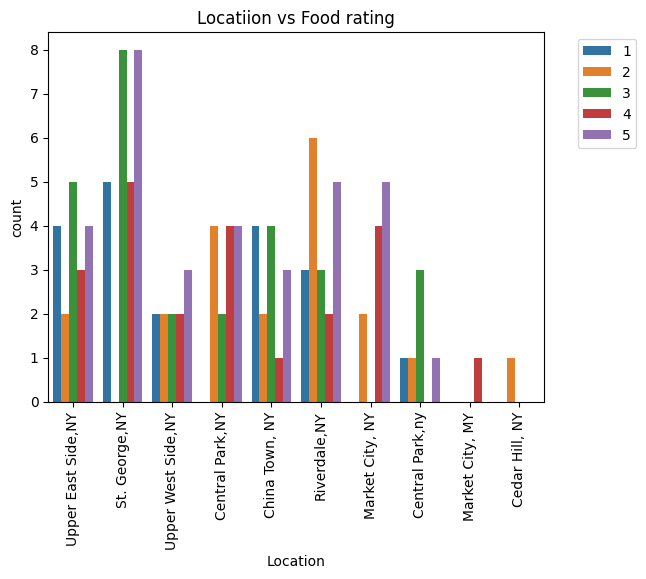

In [19]:
sns.countplot(data=data,x='Location',hue='Food_Rating')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.2,1))
plt.title('Locatiion vs Food rating')
plt.show()

### servive rating based on location

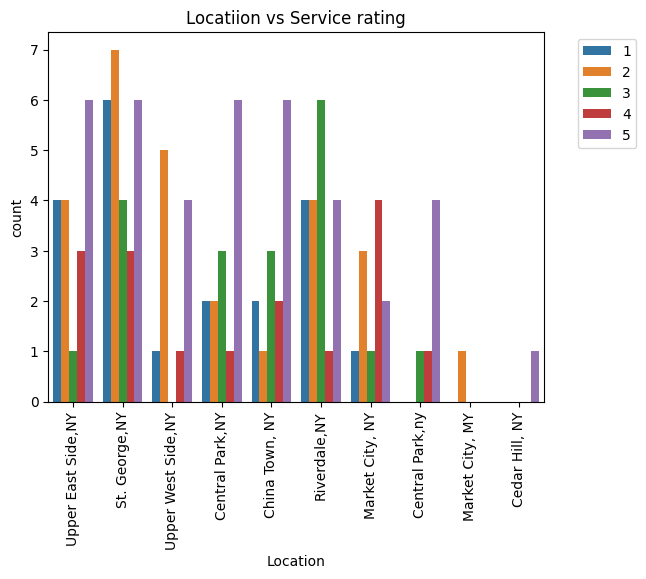

In [20]:
sns.countplot(data=data,x='Location',hue='Service_Rating')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.2,1))
plt.title('Locatiion vs Service rating')
plt.show()

### Service rating 

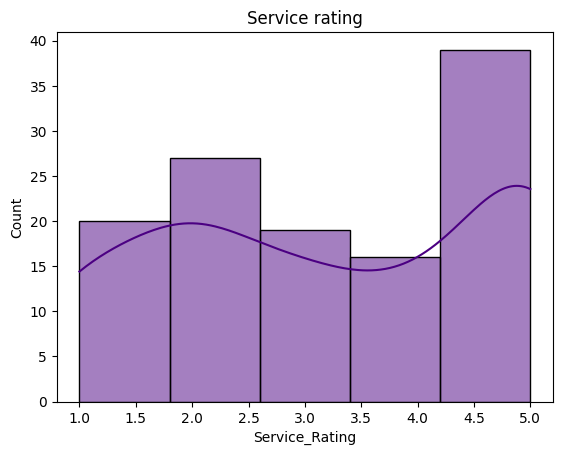

In [21]:
sns.histplot(data=data,x='Service_Rating',bins=5,kde=True,color='indigo')
plt.title('Service rating')
plt.show()

### Food rating

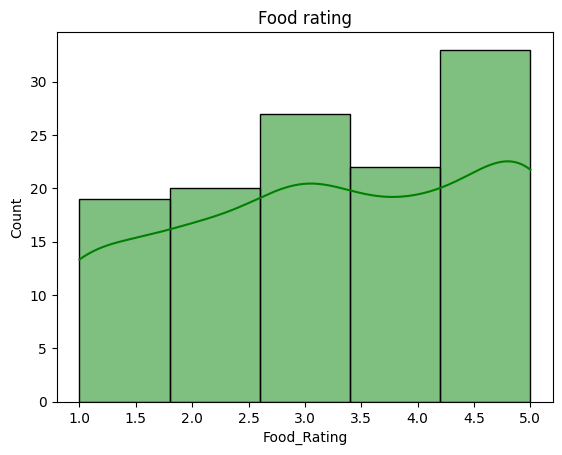

In [22]:
sns.histplot(data=data,x='Food_Rating',bins=5,kde=True,color='green')
plt.title('Food rating')
plt.show()

### Overall rating

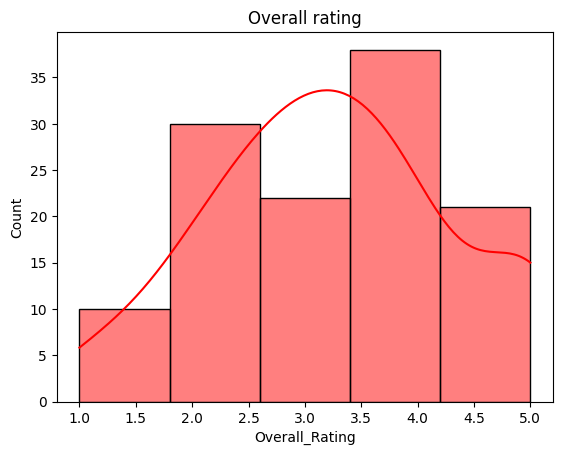

In [23]:
sns.histplot(data=data,x='Overall_Rating',bins=5,kde=True,color='red')
plt.title('Overall rating')
plt.show()

### Correlation of age,overall rating,srvuce rating and budget

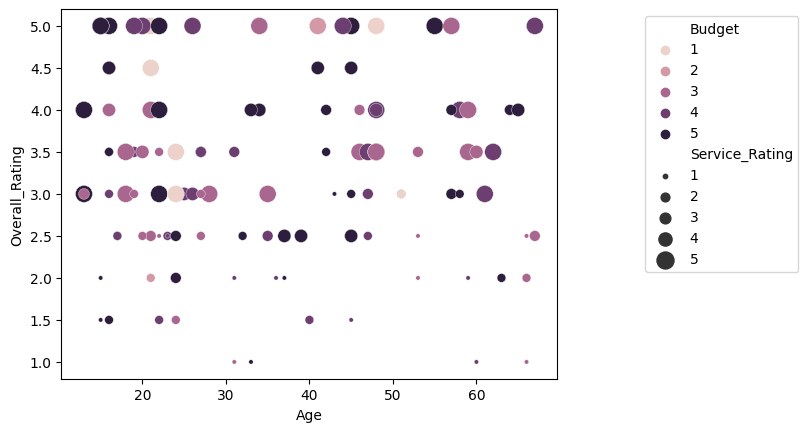

In [24]:
sns.scatterplot(x='Age', y='Overall_Rating',size='Service_Rating',sizes=[10,40,60,90,150],hue='Budget',data=data)
plt.legend(bbox_to_anchor=(1.5,1))
plt.show()

### People of different age groups preference of cuisines based on their marital status

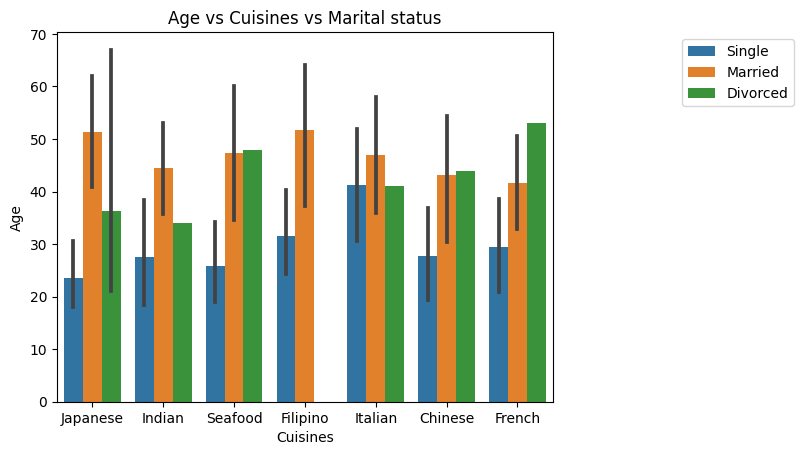

In [25]:
sns.barplot(data=data,x='Cuisines',y='Age',hue='Marital_Status')
plt.title('Age vs Cuisines vs Marital status')
plt.legend(bbox_to_anchor=(1.5,1))
plt.show()

### People of different age groups preference of cuisines based on their gender

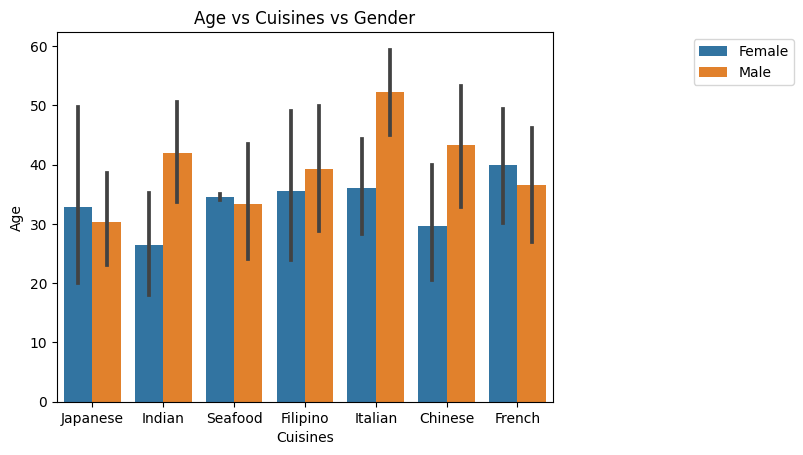

In [26]:
sns.barplot(data=data,x='Cuisines',y='Age',hue='Gender')
plt.title('Age vs Cuisines vs Gender')
plt.legend(bbox_to_anchor=(1.5,1))
plt.show()

### Cuisines food rating based on age

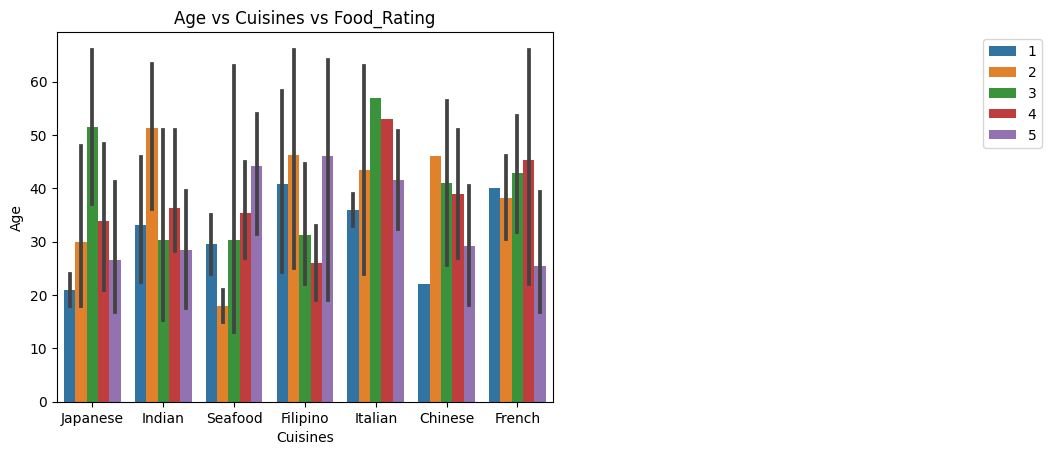

In [27]:
sns.barplot(data=data,x='Cuisines',y='Age',hue='Food_Rating')
plt.title('Age vs Cuisines vs Food_Rating')
plt.legend(bbox_to_anchor=(2,1))
plt.show()

### Service rating of different cuisines based on age

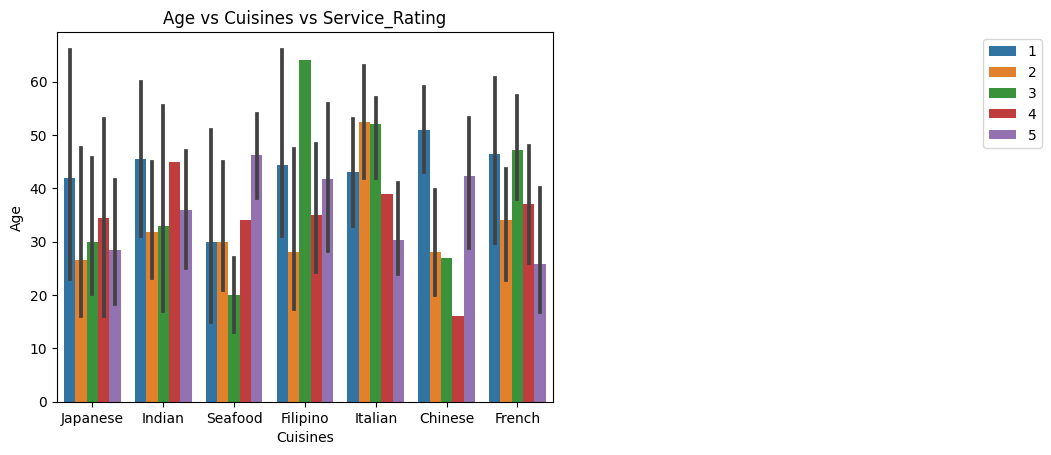

In [28]:
sns.barplot(data=data,x='Cuisines',y='Age',hue='Service_Rating')
plt.title('Age vs Cuisines vs Service_Rating')
plt.legend(bbox_to_anchor=(2,1))
plt.show()

### Service rating of different locations based on age

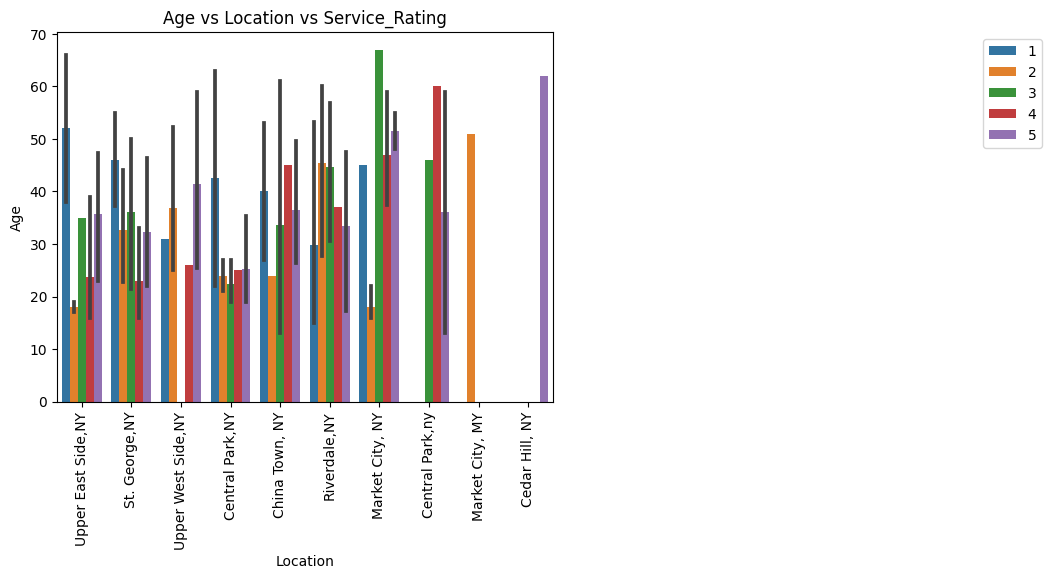

In [29]:
sns.barplot(data=data,x='Location',y='Age',hue='Service_Rating')
plt.title('Age vs Location vs Service_Rating')
plt.legend(bbox_to_anchor=(2,1))
plt.xticks(rotation=90)
plt.show()

### Overall rating of different Cuisines according to age

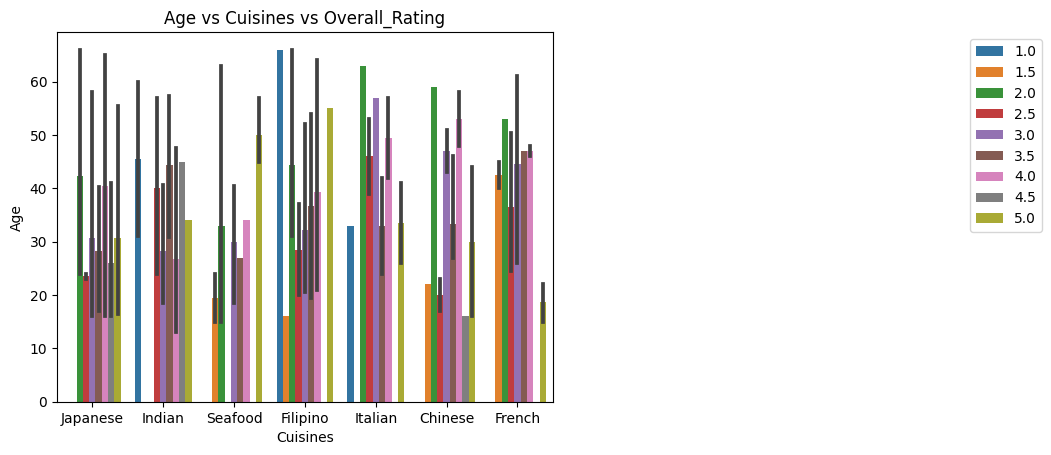

<Figure size 1800x600 with 0 Axes>

In [30]:
sns.barplot(data=data,x='Cuisines',y='Age',hue='Overall_Rating')
plt.title('Age vs Cuisines vs Overall_Rating')
plt.legend(bbox_to_anchor=(2,1))
plt.figure(figsize=(18,6))
plt.show()

### Different age group preference of location based on overall rating

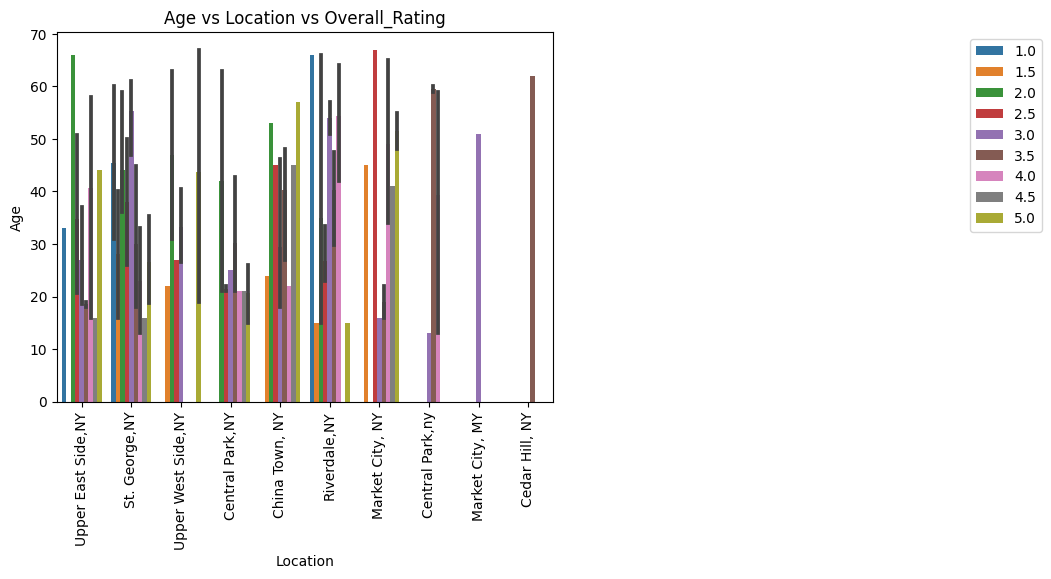

In [55]:
plt.title('Age vs Location vs Overall_Rating')
sns.barplot(data=data,x='Location',y='Age',hue='Overall_Rating')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(2,1))
plt.show()

### Preference of different cuisines based on age

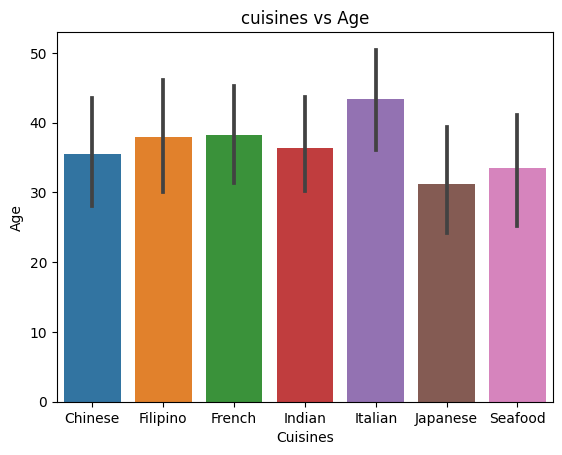

In [32]:
sns.barplot(data=data.sort_values(by='Cuisines',ascending=True),x='Cuisines',y='Age')
plt.title('cuisines vs Age')
plt.show()

### Sorting only Chinese Cuisine

In [33]:
chinese_cuisines=data[data['Cuisines']=='Chinese']
chinese_cuisines.drop(columns='Cuisines',inplace=True)

### Overall rating of chinese cuisine different gender people according to their marital status

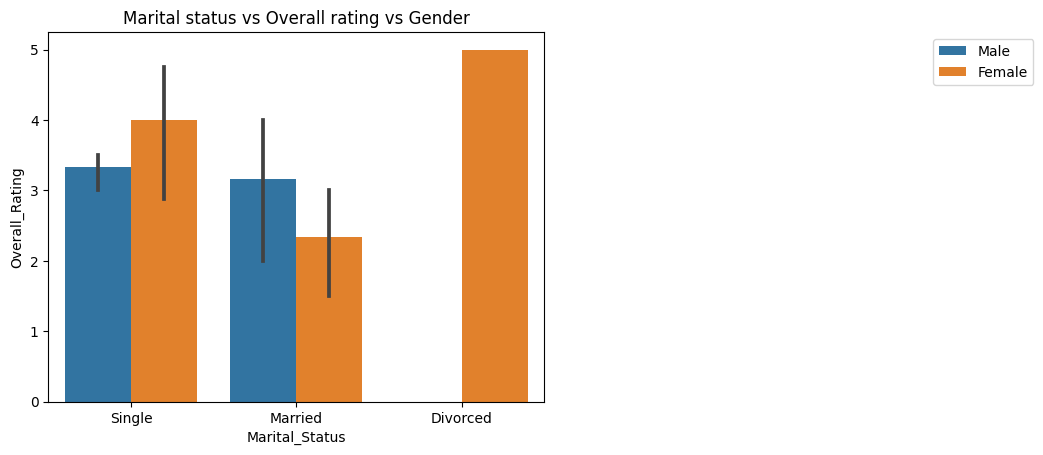

In [56]:
plt.title('Marital status vs Overall rating vs Gender')
sns.barplot(data=chinese_cuisines,y='Overall_Rating',\
            x='Marital_Status',hue='Gender')
plt.legend(bbox_to_anchor=(2,1))
plt.show()

### Overall rating gives to chinese cuisine according to  marital status 

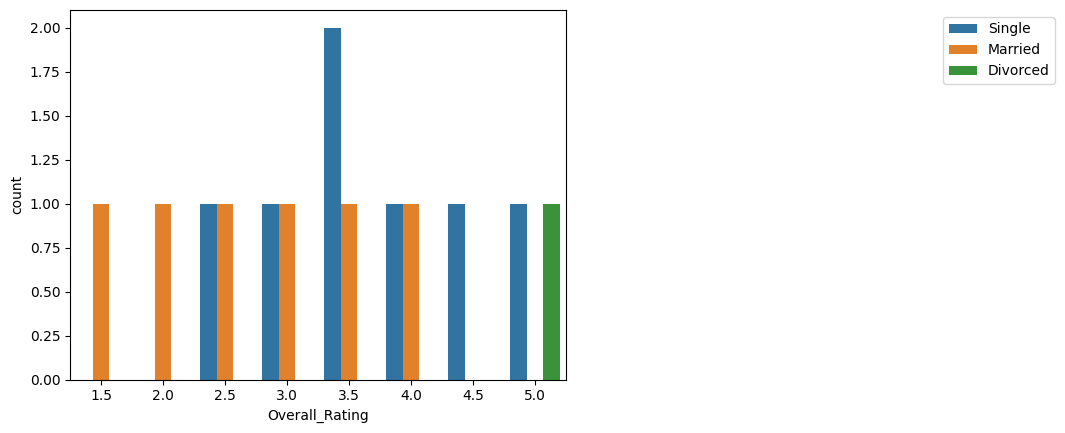

In [35]:
sns.countplot(data=chinese_cuisines,x='Overall_Rating',\
            hue='Marital_Status')
plt.legend(bbox_to_anchor=(2,1))
plt.show()

### Overall rating gives to chinese cuisine according gender

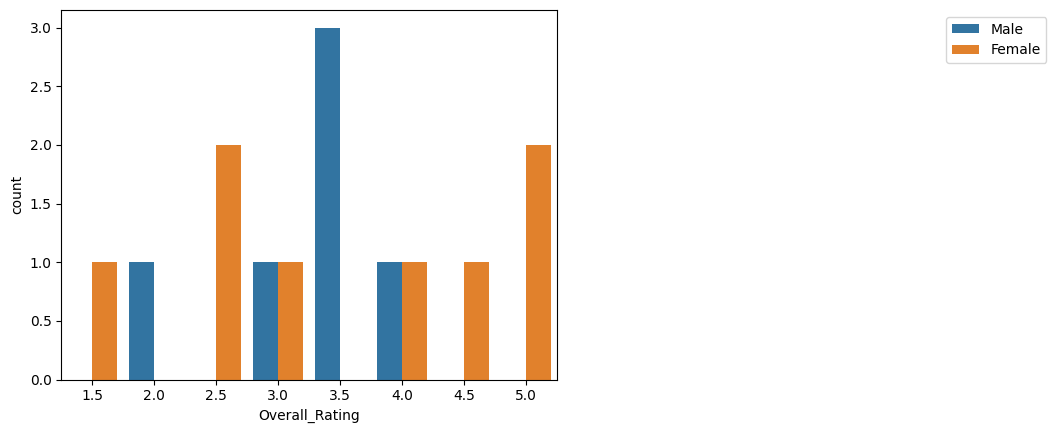

In [36]:
sns.countplot(data=chinese_cuisines,x='Overall_Rating',\
            hue='Gender')
plt.legend(bbox_to_anchor=(2,1))
plt.show()

### Food rating gives to chinese cuisine according to age

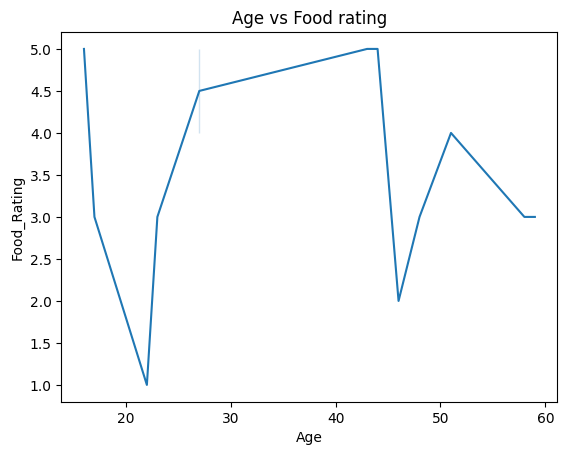

In [57]:
sns.lineplot(data=chinese_cuisines,x='Age',y='Food_Rating')
plt.title('Age vs Food rating')
plt.show()

##### People of age group 25-40 gives highest rating

### Sevice rating given to chinese cuisines by diiferet age group

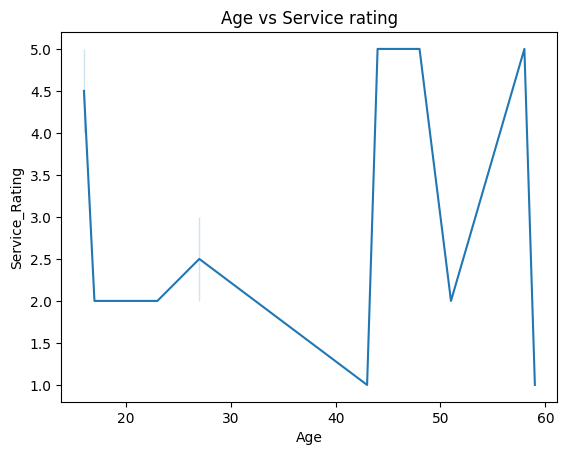

In [58]:
sns.lineplot(data=chinese_cuisines,x='Age',y='Service_Rating')
plt.title('Age vs Service rating')
plt.show()

#### 28-43 age group people gives lowest service ratings

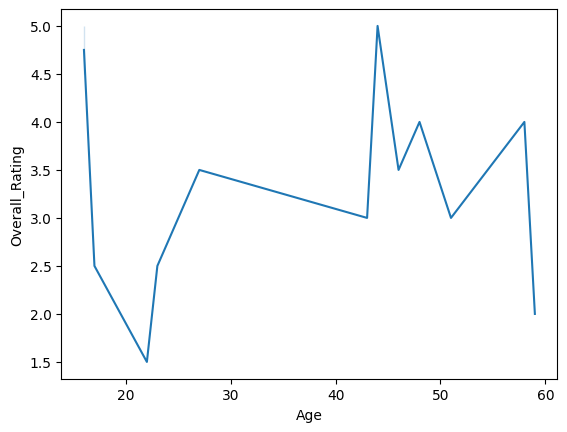

In [39]:
sns.lineplot(data=chinese_cuisines,x='Age',y='Overall_Rating')
plt.show()

In [40]:
sns.color_palette('inferno_r')

[(0.981173, 0.759135, 0.156863),
 (0.961293, 0.488716, 0.084289),
 (0.832299, 0.283913, 0.257383),
 (0.621685, 0.164184, 0.388781),
 (0.397674, 0.083257, 0.433183),
 (0.15585, 0.044559, 0.325338)]

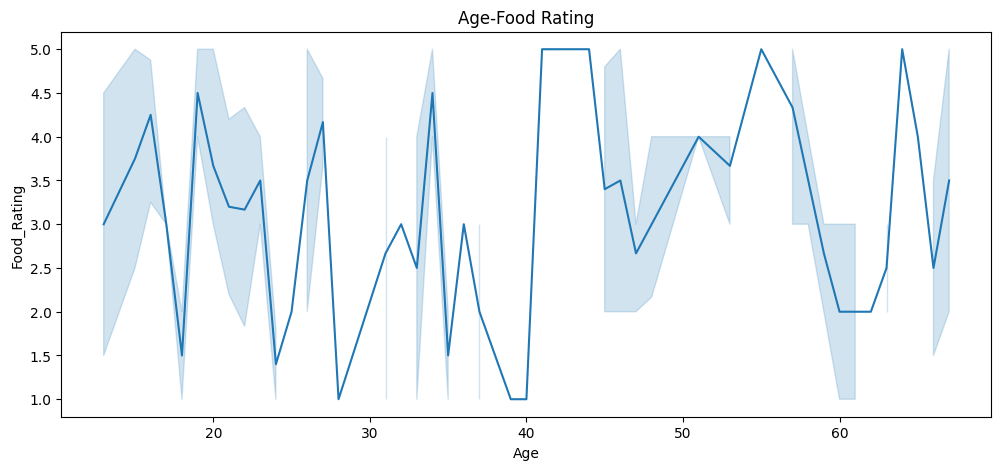

In [41]:
plt.figure(figsize=(12,5))
plt.xlabel('Age')
plt.ylabel('Food_Rating')
plt.title('Age-Food Rating')
sns.lineplot(data=data,x='Age',y='Food_Rating')
plt.show()

### Food rating for different cuisines

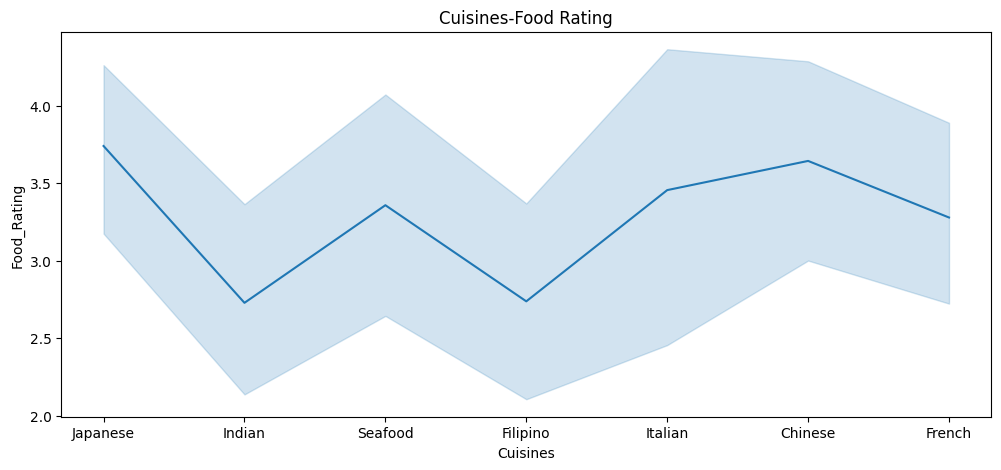

In [42]:
plt.figure(figsize=(12,5))
plt.xlabel('Cuisines')
plt.ylabel('Food_Rating')
plt.title('Cuisines-Food Rating')
sns.lineplot(data=data,x='Cuisines',y='Food_Rating')
plt.show()

#### Japanese cuisines have highest food rating and Indian and Filippino have less than 3

### Cuisines preference by overall rating

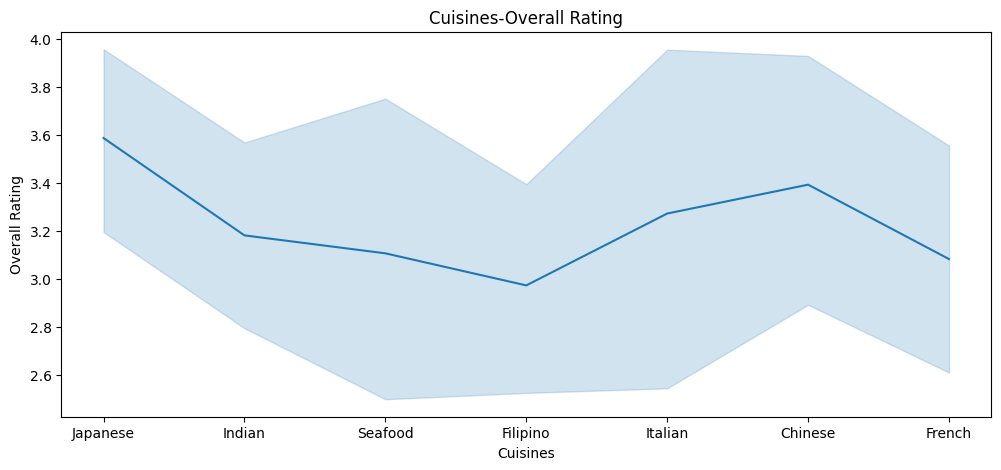

In [43]:
plt.figure(figsize=(12,5))
plt.xlabel('Cuisines')
plt.ylabel('Overall Rating')
plt.title('Cuisines-Overall Rating')
sns.lineplot(data=data,x='Cuisines',y='Overall_Rating')
plt.show()

#### People prefers japanese cuisine 

### Overall rating for different locations

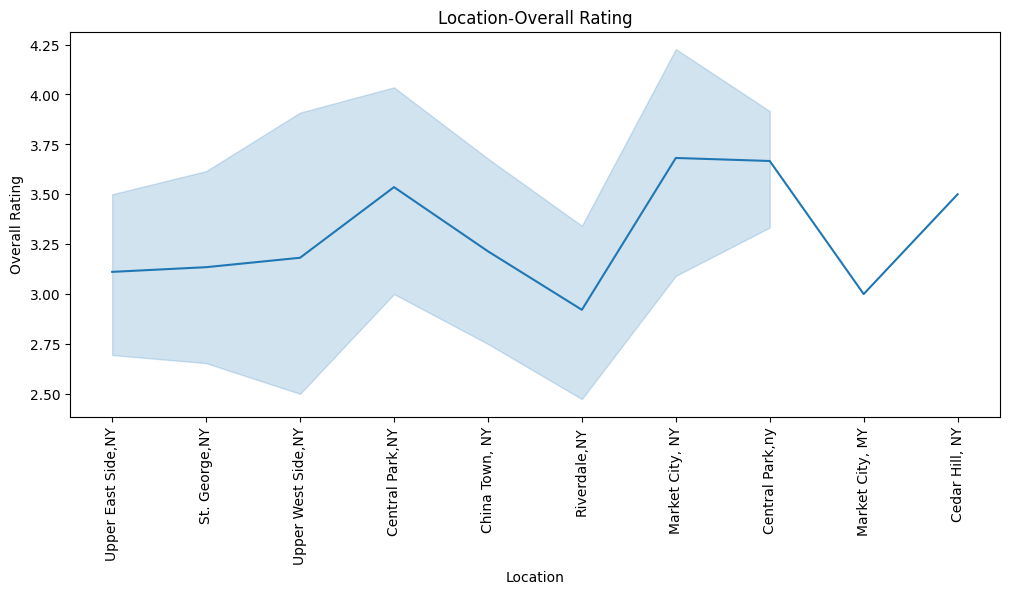

In [60]:
plt.figure(figsize=(12,5))
plt.xlabel('Location')
plt.ylabel('Overall Rating')
plt.title('Location-Overall Rating')
sns.lineplot(data=data,x='Location',y='Overall_Rating')
plt.xticks(rotation=90)
plt.show()

#### Market City and Central Park has highest overall rating

### Gender distribution

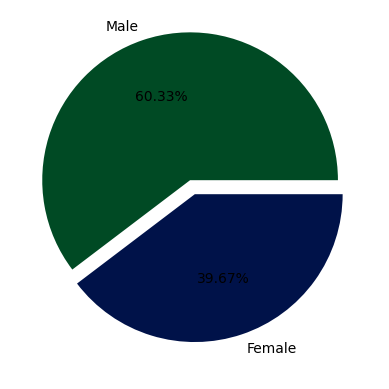

In [44]:
palette_color=sns.color_palette('ocean')
plt.pie(data=data,x=data.Gender.value_counts(),\
       explode=[0.1,0],\
       colors=palette_color,\
       labels=['Male','Female'],\
       autopct='%0.2f%%');

### Cuisines distribution

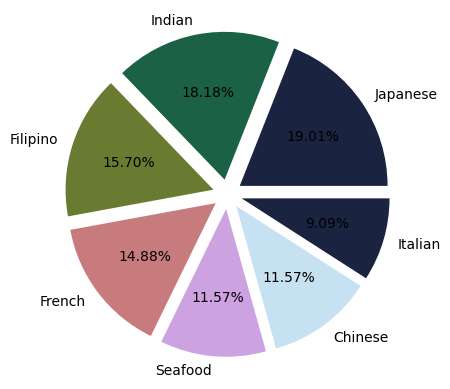

In [47]:
palette_color=sns.color_palette('cubehelix')
plt.pie(data=data,x=data.Cuisines.value_counts(),\
       explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1],\
       colors=palette_color,\
       labels=['Japanese','Indian','Filipino','French','Seafood','Chinese','Italian'],\
       autopct='%0.2f%%');

##### Most people prefers Japanese and Indian cuisines

### Food rating distribution

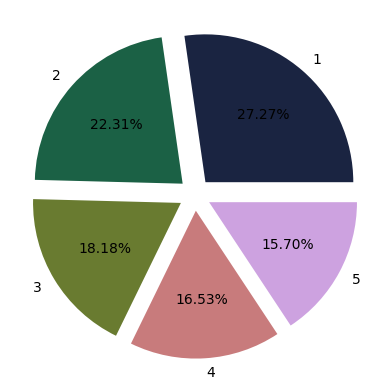

In [49]:
palette_color=sns.color_palette('cubehelix')
plt.pie(data=data,x=data.Food_Rating.value_counts(),\
        colors=palette_color,\
        labels=[1,2,3,4,5],\
        explode=[0.11,0.11,0.11,0.11,0.11],\
        autopct='%0.2f%%');

##### Half of the people gives 1 or 2 as food rating

### Service rating distribution

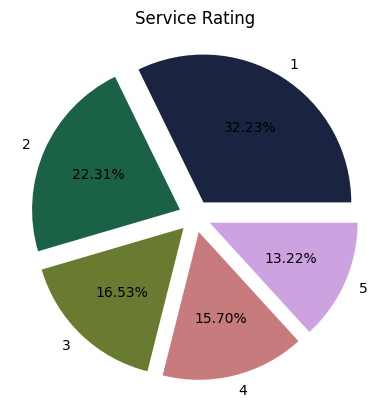

In [51]:
palette_color=sns.color_palette('cubehelix')
plt.title('Service Rating')
plt.pie(data=data,x=data.Service_Rating.value_counts(),\
        colors=palette_color,\
        labels=[1,2,3,4,5],\
        explode=[0.11,0.11,0.11,0.11,0.11],\
        autopct='%0.2f%%');

##### Half of the people are not satisfied with the service

In [61]:
data.head()

,Location,Gender,Marital_Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food_Rating,Service_Rating,Overall_Rating,Often_A_S,Age
0,"Upper East Side,NY",Female,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No,16
1,"St. George,NY",Female,Married,Student,3,Indian,Never,Socially,1,1,1.0,No,31
2,"Upper West Side,NY",Male,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes,45
3,"Upper East Side,NY",Female,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No,66
4,"Central Park,NY",Male,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No,25


### Sorting of budget greater than 3

In [63]:
Budget_high=data[data.Budget>=3]
Budget_high

,Location,Gender,Marital_Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food_Rating,Service_Rating,Overall_Rating,Often_A_S,Age
0,"Upper East Side,NY",Female,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No,16
1,"St. George,NY",Female,Married,Student,3,Indian,Never,Socially,1,1,1.0,No,31
2,"Upper West Side,NY",Male,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes,45
3,"Upper East Side,NY",Female,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No,66
4,"Central Park,NY",Male,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,"China Town, NY",Male,Single,Student,5,Indian,Never,Never,3,5,4.0,No,22
132,"Upper West Side,NY",Male,Single,Professional,3,Indian,Often,Never,4,2,3.0,No,27
133,"Central Park,ny",Female,Single,Professional,5,Indian,Socially,Socially,3,5,4.0,No,13
135,"Riverdale,NY",Male,Single,Professional,5,Japanese,Never,Socially,2,3,2.5,No,24


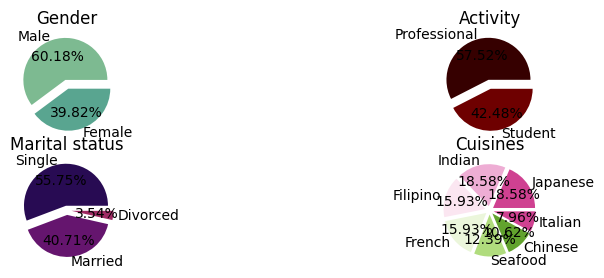

In [69]:
plt.figure(figsize=(10,3))
plt.subplot(2,6,1)
palette_color=sns.color_palette('crest')
plt.title('Gender')
plt.pie(data=Budget_high,x=Budget_high.Gender.value_counts(),\
        colors=palette_color,\
        labels=['Male','Female'],\
        explode=[0.11,0.11],\
        autopct='%0.2f%%');

plt.subplot(2,6,2)
palette_color=sns.color_palette('gist_heat')
plt.title('Activity')
plt.pie(data=Budget_high,x=Budget_high.Activity.value_counts(),\
        colors=palette_color,\
        labels=['Professional','Student'],\
        explode=[0.11,0.11],\
        autopct='%0.2f%%');

plt.subplot(2,6,3)
palette_color=sns.color_palette('inferno')
plt.title('Marital status')
plt.pie(data=Budget_high,x=Budget_high.Marital_Status.value_counts(),\
        colors=palette_color,\
        labels=['Single','Married','Divorced'],\
        explode=[0.11,0.11,0.11],\
        autopct='%0.2f%%');

plt.subplot(2,6,4)
palette_color=sns.color_palette('PiYG')
plt.title('Cuisines')
plt.pie(data=Budget_high,x=Budget_high.Cuisines.value_counts(),\
        colors=palette_color,\
        labels=['Japanese','Indian','Filipino','French','Seafood','Chinese','Italian'],\
        explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1],\
        autopct='%0.2f%%');

plt.subplot(2,6,5)
palette_color=sns.color_palette('crest')
plt.title('Budget')
plt.pie(data=Budget_high,x=Budget_high.Budget.value_counts(),\
        colors=palette_color,\
        labels=[3,4,5],\
        explode=[0.1,0.1,0.1],\
        autopct='%0.2f%%');

plt.subplot(2,2,6)
palette_color=sns.color_palette('PiYG')
plt.title('Alcohol')
plt.pie(data=Budget_high,x=Budget_high.Alcohol.value_counts(),\
        colors=palette_color,\
        labels=['Japanese','Indian','Filipino','French','Seafood','Chinese','Italian'],\
        explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1],\
        autopct='%0.2f%%');